<a href="https://colab.research.google.com/github/hanbuck30/myrepo/blob/main/svm_regre.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [73]:
from sklearn import svm
from sklearn.ensemble import GradientBoostingRegressor
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Dataset 준비

In [74]:
df=pd.read_csv("Data.csv",encoding='CP949')
df

,PSS(지각된 스트레스 척도),코르티솔,심박수,산소포화도,심박변이,0_Fp1_δ (0),0_Fp2_δ (1),0_F3_δ (2),0_F4_δ (3),0_F7_δ (4),...,3_T7_Alpha Peak_w (712),3_T8_Alpha Peak_w (713),3_Cz_Alpha Peak_w (714),3_P3_Alpha Peak_w (715),3_P4_Alpha Peak_w (716),3_P7_Alpha Peak_w (717),3_P8_Alpha Peak_w (718),3_Pz_Alpha Peak_w (719),3_O1_Alpha Peak_w (720),3_O2_Alpha Peak_w (721)
0,16,0.088,83,97,31,1.260000e-12,7.450000e-13,4.130000e-14,5.580000e-13,2.570000e-13,...,-4.35,-3.35,-3.40,-4.35,-3.45,-3.40,-4.25,-4.35,-3.40,-3.45
1,18,0.171,72,98,37,2.100000e-13,3.350000e-13,4.840000e-14,2.730000e-14,2.280000e-15,...,0.40,4.15,-3.80,-0.30,3.20,0.15,3.60,0.50,3.20,2.90
2,26,0.122,92,97,24,2.230000e-40,9.940000e-41,7.800000e-42,1.470000e-41,5.450000e-41,...,-2.95,-3.15,-3.00,-2.85,-2.80,-3.10,-2.85,-2.85,-2.65,-2.75
3,17,0.124,76,97,45,1.010000e-13,4.240000e-14,5.350000e-13,3.600000e-13,5.650000e-14,...,0.90,2.00,0.95,-0.25,1.90,-0.20,1.70,1.80,-0.15,-0.20
4,15,0.128,75,48,38,9.830000e-16,9.980000e-15,3.030000e-13,6.670000e-14,7.040000e-15,...,0.00,-0.25,-0.20,0.00,2.85,0.00,-0.25,-0.15,-0.10,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,27,0.112,85,98,32,2.770000e-14,8.590000e-14,1.760000e-13,5.310000e-15,9.760000e-13,...,7.90,3.90,-0.05,4.00,0.00,3.60,3.65,4.45,3.80,3.70
176,23,0.134,92,98,14,4.570000e-14,1.400000e-13,1.630000e-14,4.280000e-14,1.480000e-13,...,0.45,-2.75,-3.35,-3.15,1.10,0.55,-0.10,0.65,0.60,1.20
177,10,0.151,68,98,41,5.440000e-42,4.330000e-42,4.980000e-40,5.050000e-40,4.560000e-41,...,-0.60,-0.60,-2.85,-0.60,-2.85,-3.45,-3.60,-0.60,-2.80,-2.80
178,10,0.107,83,98,31,6.060000e-13,2.660000e-13,4.220000e-13,1.460000e-14,1.890000e-14,...,-4.10,-2.10,2.35,-2.25,0.40,2.40,-0.50,-0.45,2.50,2.35


In [75]:
df.describe()

,PSS(지각된 스트레스 척도),코르티솔,심박수,산소포화도,심박변이,0_Fp1_δ (0),0_Fp2_δ (1),0_F3_δ (2),0_F4_δ (3),0_F7_δ (4),...,3_T7_Alpha Peak_w (712),3_T8_Alpha Peak_w (713),3_Cz_Alpha Peak_w (714),3_P3_Alpha Peak_w (715),3_P4_Alpha Peak_w (716),3_P7_Alpha Peak_w (717),3_P8_Alpha Peak_w (718),3_Pz_Alpha Peak_w (719),3_O1_Alpha Peak_w (720),3_O2_Alpha Peak_w (721)
count,180.000000,180.000000,180.000000,180.000000,180.000000,1.800000e+02,1.800000e+02,1.800000e+02,1.800000e+02,1.800000e+02,...,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,18.494444,0.137839,74.672222,97.600000,34.411111,5.757650e-12,3.723047e-12,5.163789e-12,3.793818e-12,2.020830e-12,...,-0.680556,-0.563611,-0.768333,-0.865833,-0.527500,-0.759167,-0.670556,-0.924444,-0.629722,-0.570556
std,5.051132,0.086779,11.489043,3.736577,8.436943,5.569867e-11,2.031909e-11,5.131491e-11,2.667421e-11,9.716337e-12,...,2.602676,2.621947,2.509813,2.190772,2.320399,2.333958,2.373720,2.382416,2.410305,2.467712
min,8.000000,0.020000,39.000000,48.000000,14.000000,2.940000e-43,3.050000e-43,2.950000e-43,3.040000e-43,2.970000e-43,...,-7.150000,-5.800000,-5.900000,-5.800000,-5.550000,-6.100000,-5.600000,-5.850000,-7.250000,-5.600000
25%,15.000000,0.083750,67.000000,98.000000,30.000000,3.292500e-16,2.142500e-15,3.987500e-16,2.725000e-15,6.190000e-16,...,-2.762500,-2.812500,-2.912500,-2.900000,-2.350000,-2.887500,-2.700000,-2.937500,-2.687500,-2.675000
50%,19.000000,0.116500,74.000000,98.000000,34.000000,4.795000e-14,1.510000e-13,7.345000e-14,1.185000e-13,4.570000e-14,...,-0.350000,-0.125000,-0.275000,-0.250000,-0.150000,-0.150000,-0.175000,-0.425000,-0.125000,-0.100000
75%,21.250000,0.171000,83.000000,98.000000,38.000000,4.610000e-13,5.922500e-13,5.687500e-13,9.127500e-13,4.515000e-13,...,0.400000,0.712500,0.562500,0.450000,0.650000,0.600000,0.600000,0.400000,0.612500,0.825000
max,31.000000,0.538000,108.000000,99.000000,81.000000,7.420000e-10,2.160000e-10,6.850000e-10,3.500000e-10,1.070000e-10,...,7.900000,7.400000,6.700000,5.300000,6.650000,5.700000,6.650000,6.650000,7.550000,6.650000


In [76]:
df.columns

Index(['PSS(지각된 스트레스 척도)', '코르티솔', '심박수', '산소포화도', '심박변이', '0_Fp1_δ (0)',
       '0_Fp2_δ (1)', '0_F3_δ (2)', '0_F4_δ (3)', '0_F7_δ (4)',
       ...
       '3_T7_Alpha Peak_w (712)', '3_T8_Alpha Peak_w (713)',
       '3_Cz_Alpha Peak_w (714)', '3_P3_Alpha Peak_w (715)',
       '3_P4_Alpha Peak_w (716)', '3_P7_Alpha Peak_w (717)',
       '3_P8_Alpha Peak_w (718)', '3_Pz_Alpha Peak_w (719)',
       '3_O1_Alpha Peak_w (720)', '3_O2_Alpha Peak_w (721)'],
      dtype='object', length=3805)

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Columns: 3805 entries, PSS(지각된 스트레스 척도) to 3_O2_Alpha Peak_w (721)
dtypes: float64(3657), int64(148)
memory usage: 5.2 MB


In [78]:
y = df[["PSS(지각된 스트레스 척도)"]]
z =df[['코르티솔']]
z = (z -z.min())/(z.max() - z.min()) # 코르티솔 값
y = (y -y.min())/(y.max() - y.min()) #normalization 된 pss값 (0 to 1)
x_train=df.drop(columns=['PSS(지각된 스트레스 척도)','코르티솔']) #x_train = Data로 사용될 수 있는 value


In [79]:
x_train

,심박수,산소포화도,심박변이,0_Fp1_δ (0),0_Fp2_δ (1),0_F3_δ (2),0_F4_δ (3),0_F7_δ (4),0_F8_δ (5),0_Fz_δ (6),...,3_T7_Alpha Peak_w (712),3_T8_Alpha Peak_w (713),3_Cz_Alpha Peak_w (714),3_P3_Alpha Peak_w (715),3_P4_Alpha Peak_w (716),3_P7_Alpha Peak_w (717),3_P8_Alpha Peak_w (718),3_Pz_Alpha Peak_w (719),3_O1_Alpha Peak_w (720),3_O2_Alpha Peak_w (721)
0,83,97,31,1.260000e-12,7.450000e-13,4.130000e-14,5.580000e-13,2.570000e-13,3.960000e-13,5.620000e-14,...,-4.35,-3.35,-3.40,-4.35,-3.45,-3.40,-4.25,-4.35,-3.40,-3.45
1,72,98,37,2.100000e-13,3.350000e-13,4.840000e-14,2.730000e-14,2.280000e-15,1.070000e-13,4.660000e-15,...,0.40,4.15,-3.80,-0.30,3.20,0.15,3.60,0.50,3.20,2.90
2,92,97,24,2.230000e-40,9.940000e-41,7.800000e-42,1.470000e-41,5.450000e-41,1.990000e-41,1.770000e-41,...,-2.95,-3.15,-3.00,-2.85,-2.80,-3.10,-2.85,-2.85,-2.65,-2.75
3,76,97,45,1.010000e-13,4.240000e-14,5.350000e-13,3.600000e-13,5.650000e-14,3.760000e-17,5.770000e-13,...,0.90,2.00,0.95,-0.25,1.90,-0.20,1.70,1.80,-0.15,-0.20
4,75,48,38,9.830000e-16,9.980000e-15,3.030000e-13,6.670000e-14,7.040000e-15,1.270000e-13,4.390000e-15,...,0.00,-0.25,-0.20,0.00,2.85,0.00,-0.25,-0.15,-0.10,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,85,98,32,2.770000e-14,8.590000e-14,1.760000e-13,5.310000e-15,9.760000e-13,5.470000e-13,1.020000e-12,...,7.90,3.90,-0.05,4.00,0.00,3.60,3.65,4.45,3.80,3.70
176,92,98,14,4.570000e-14,1.400000e-13,1.630000e-14,4.280000e-14,1.480000e-13,2.600000e-15,1.020000e-12,...,0.45,-2.75,-3.35,-3.15,1.10,0.55,-0.10,0.65,0.60,1.20
177,68,98,41,5.440000e-42,4.330000e-42,4.980000e-40,5.050000e-40,4.560000e-41,5.070000e-41,1.580000e-39,...,-0.60,-0.60,-2.85,-0.60,-2.85,-3.45,-3.60,-0.60,-2.80,-2.80
178,83,98,31,6.060000e-13,2.660000e-13,4.220000e-13,1.460000e-14,1.890000e-14,4.500000e-14,4.740000e-13,...,-4.10,-2.10,2.35,-2.25,0.40,2.40,-0.50,-0.45,2.50,2.35


In [80]:
y

,PSS(지각된 스트레스 척도)
0,0.347826
1,0.434783
2,0.782609
3,0.391304
4,0.304348
...,...
175,0.826087
176,0.652174
177,0.086957
178,0.086957


# svm_Regression

In [81]:
svm_regression_y =svm.SVR(kernel="poly", degree=2, C=1, epsilon=0.1,gamma='auto')
svm_regression_z =svm.SVR(kernel="poly", degree=2, C=1, epsilon=0.1,gamma='auto')
svm_regression_y.fit(x_train, y)
svm_regression_z.fit(x_train, z)
y_pred_svm = svm_regression_y.predict(x_train)
z_pred_svm = svm_regression_z.predict(x_train)
def plot_svm_regression(svm_reg, X, y):
    y_pred = svm_reg.predict(X)
    #plt.scatter(y,y_pred ,alpha=0.5)
    plt.plot(X, y_pred, "k-", linewidth=2)
    #plt.plot(X, y_pred + svm_reg.epsilon, "k--")
    #plt.plot(X, y_pred - svm_reg.epsilon, "k--")
    
    plt.ylabel('pred_value',fontsize=18)
    plt.xlabel("Data", fontsize=18)
    plt.legend()

    

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [82]:
y_pred_svm

array([ 0.24762613,  0.46831896,  0.69502617,  0.49134135,  0.40441121,
        0.81282917,  0.46528795,  0.24782053,  0.57833995,  0.41978828,
        0.40442159,  0.54234231,  0.72620589,  0.68259602,  0.18696478,
        0.14353103,  0.47158282,  0.59581668,  0.6652276 ,  0.63917667,
        0.38364554,  0.10010265,  0.55207122,  0.55211538,  0.55215179,
        0.18700915,  0.1434792 ,  0.27398313,  0.37821082,  0.42159032,
        0.42161307,  0.30430599,  0.36467844,  0.44786846,  0.83932167,
        0.68239073,  0.42148332,  0.53481078,  0.42862997,  0.3346248 ,
        0.53499038,  0.36079839,  0.36071488,  0.186961  ,  0.18700477,
        0.23036971,  0.1867746 ,  0.31947532,  0.31750554,  0.50859738,
        0.50850266,  0.53507121,  0.50864083,  0.20430079,  0.4041131 ,
        0.46523158,  0.49145374,  0.59037355,  0.43864094,  0.50860601,
        0.44998079,  0.31536322,  0.46817051,  0.44948828,  0.4478861 ,
        0.42179294,  0.44200079,  0.62210856,  0.72606755,  0.76

In [83]:
z_pred_svm

array([ 0.23102237,  0.19142235,  0.29679272,  0.10097116,  0.308404  ,
        0.21464431,  0.25461034,  0.228418  ,  0.71267072,  0.39158923,
        0.33156636,  0.2281516 ,  0.28337611,  0.11761375,  0.10384771,
        0.25447247,  0.1444471 ,  0.40524985,  0.19150082,  0.79571405,
        0.26419556,  0.32683362,  0.25445682,  0.23317314,  0.43350678,
        0.62894383,  0.2621122 ,  0.20738492,  0.20237493,  0.33446084,
        0.21281856,  0.16936764,  0.0527238 ,  0.20216649,  0.20521943,
        0.26257566,  0.23896493,  0.30002287,  0.751158  ,  0.17067753,
        0.04319572,  0.14913139,  0.10556851,  0.18933263,  0.29489475,
        0.16809441,  0.13726038,  0.19637068,  0.24278161,  0.27368489,
        0.27652921,  0.08371976,  0.19081828,  0.24555292,  0.19563083,
        0.27357405,  0.25063451,  0.14558785,  0.2004192 ,  0.21868069,
        0.26862606,  0.2109944 ,  0.14250954,  0.26986316, -0.10001354,
        0.20619474,  0.32822135,  0.09615968,  0.40338878,  0.24

emsemble Regression

In [104]:
gbrt_y = GradientBoostingRegressor(max_depth=10, n_estimators=300, learning_rate=1e-4, random_state=42)
gbrt_z = GradientBoostingRegressor(max_depth=10, n_estimators=300, learning_rate=1e-4, random_state=42)
gbrt_y.fit(x_train, y.values.ravel())
gbrt_z.fit(x_train, z.values.ravel())

GradientBoostingRegressor(learning_rate=0.0001, max_depth=10, n_estimators=300,
                          random_state=42)

In [85]:
print('y_pred_ensemble :', gbrt_y.predict(x_train)) #ensemble model

y_pred_ensemble : [0.455201   0.45606628 0.45952738 0.45563364 0.45476837 0.46082529
 0.45736419 0.455201   0.45649892 0.45606628 0.45476837 0.45649892
 0.45996002 0.45952738 0.45260518 0.45217254 0.45563364 0.4586621
 0.45736419 0.45779683 0.45606628 0.4517399  0.45822947 0.45822947
 0.45822947 0.45260518 0.45217254 0.45347045 0.45649892 0.45693155
 0.45693155 0.45390309 0.45563364 0.455201   0.45909474 0.45952738
 0.45693155 0.45606628 0.45606628 0.45606628 0.45606628 0.45433573
 0.45433573 0.45260518 0.45260518 0.45303782 0.45260518 0.45476837
 0.45390309 0.45779683 0.45779683 0.45606628 0.45779683 0.45476837
 0.45476837 0.45736419 0.45563364 0.45736419 0.45693155 0.45779683
 0.45563364 0.45563364 0.45563364 0.45649892 0.45693155 0.45693155
 0.45693155 0.45693155 0.45996002 0.46039265 0.45779683 0.45779683
 0.455201   0.45693155 0.45693155 0.45693155 0.45260518 0.45390309
 0.45303782 0.45649892 0.45736419 0.46082529 0.46082529 0.45606628
 0.45693155 0.45649892 0.45433573 0.45736419 

svm visualize

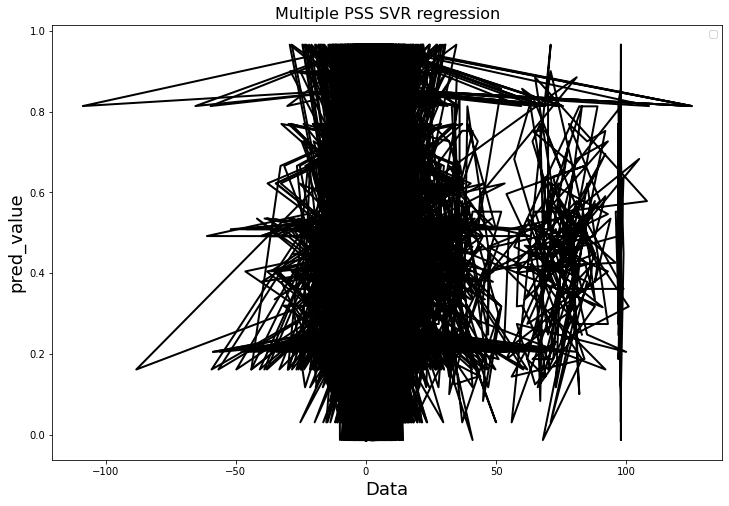

In [86]:
fig = plt.figure()
fig.set_size_inches(12, 8)
plot_svm_regression(svm_regression_y, x_train, y)
plt.title("Multiple PSS SVR regression",fontsize=16)
plt.show()

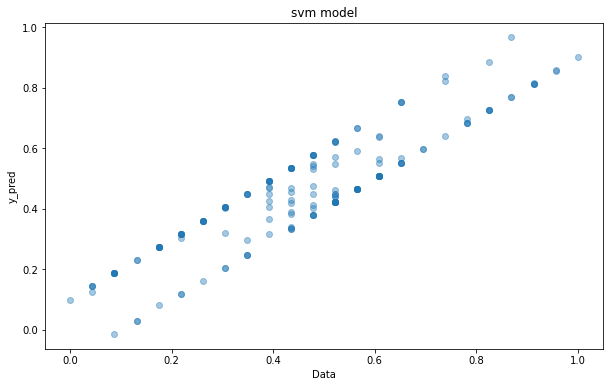

In [87]:
fig = plt.figure()
fig.set_size_inches(10,6)
plt.scatter(y, y_pred_svm,alpha=0.4)
plt.title("svm model")
plt.xlabel("Data")
plt.ylabel("y_pred")
plt.show()

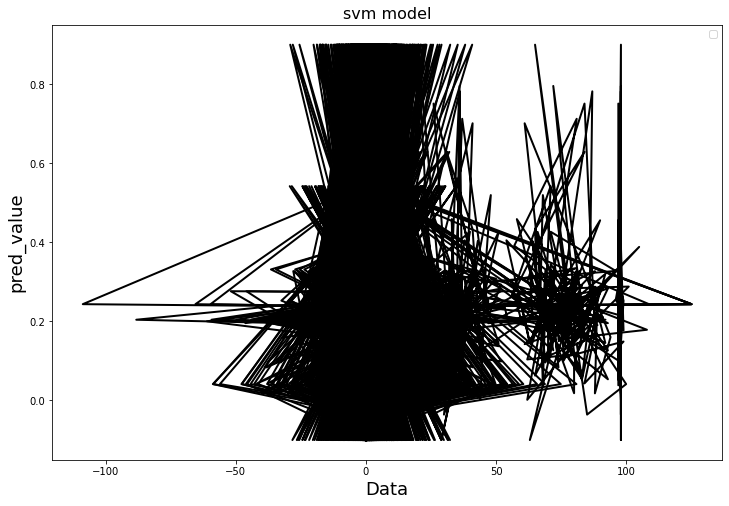

In [88]:
fig = plt.figure()
fig.set_size_inches(12, 8)
plot_svm_regression(svm_regression_z, x_train, z)
plt.title("svm model",fontsize=16)
plt.show()

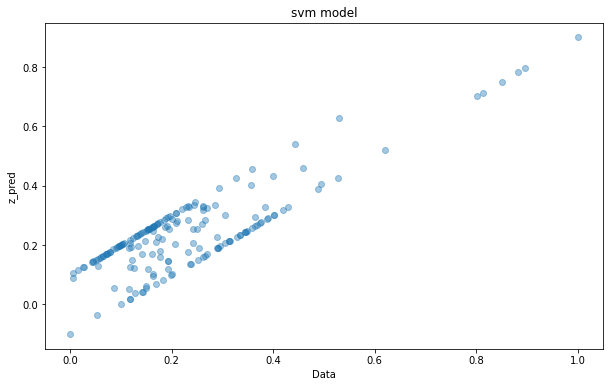

In [105]:
fig = plt.figure()
fig.set_size_inches(10,6)
plt.scatter(z, z_pred_svm,alpha=0.4)
plt.title("svm model")
plt.xlabel("Data")
plt.ylabel("z_pred")
plt.show()

ensemble visulalize

In [106]:
y_pred_ensemble = gbrt_y.predict(x_train)
z_pred_ensemble = gbrt_z.predict(x_train)

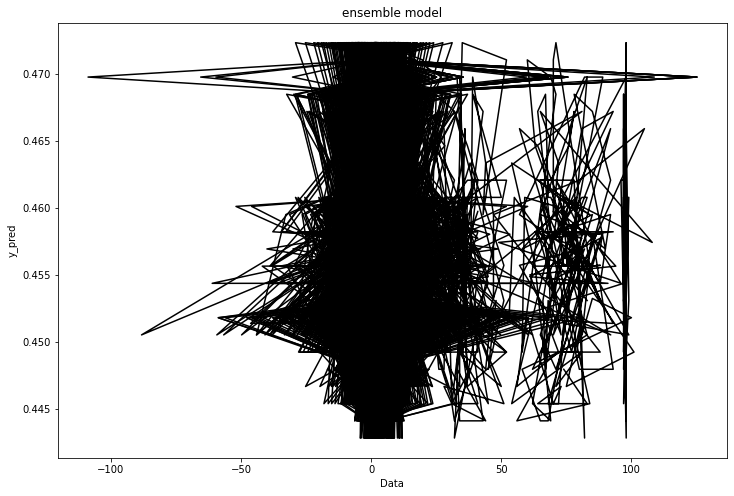

In [107]:
fig = plt.figure()
fig.set_size_inches(12,8)
plt.plot(x_train, y_pred_ensemble,"k-")
plt.title("ensemble model")
plt.xlabel("Data")
plt.ylabel("y_pred")
plt.show()

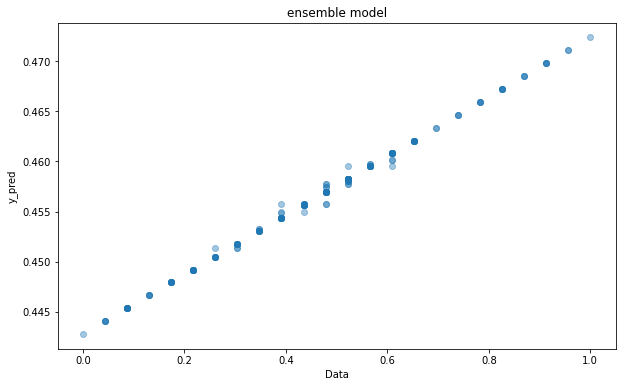

In [108]:
fig = plt.figure()
fig.set_size_inches(10,6)
plt.scatter(y, y_pred_ensemble,alpha=0.4)
plt.title("ensemble model")
plt.xlabel("Data")
plt.ylabel("y_pred")
plt.show()

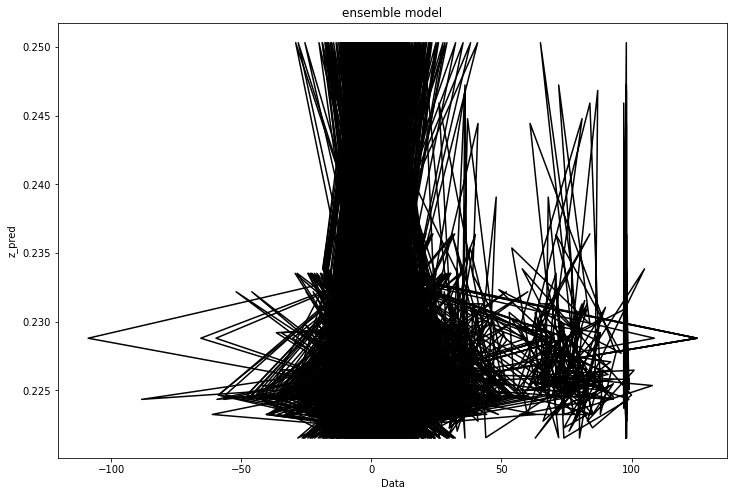

In [109]:
fig = plt.figure()
fig.set_size_inches(12,8)
plt.plot(x_train, z_pred_ensemble,"k-")
plt.title("ensemble model")
plt.xlabel("Data")
plt.ylabel("z_pred")
plt.show()

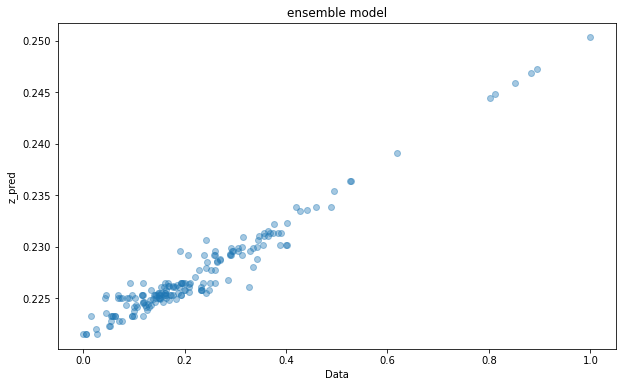

In [110]:
fig = plt.figure()
fig.set_size_inches(10,6)
plt.scatter(z, z_pred_ensemble,alpha=0.4)
plt.title("ensemble model")
plt.xlabel("Data")
plt.ylabel("z_pred")
plt.show()

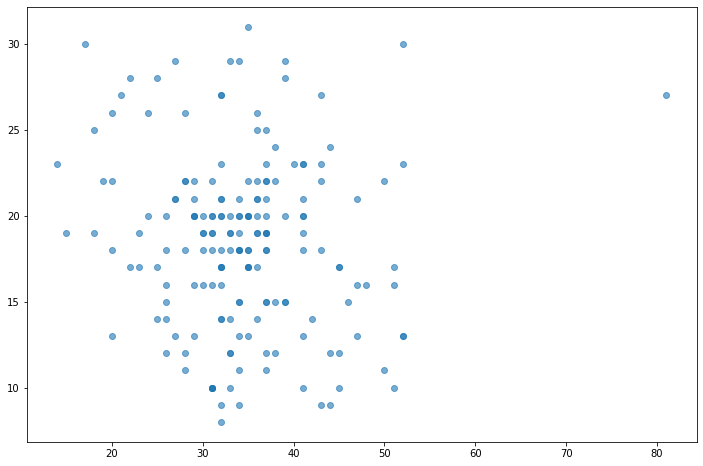

In [94]:
fig = plt.figure()
fig.set_size_inches(12, 8)
plt.scatter(df[["심박변이"]],df[['PSS(지각된 스트레스 척도)']],alpha=0.6)
plt.show()

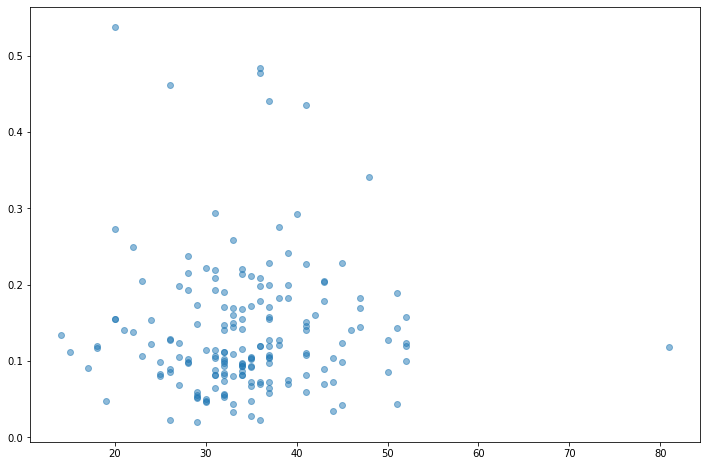

In [95]:
fig = plt.figure()
fig.set_size_inches(12, 8)
plt.scatter(df[["심박변이"]],df[['코르티솔']],alpha=0.5)
plt.show()

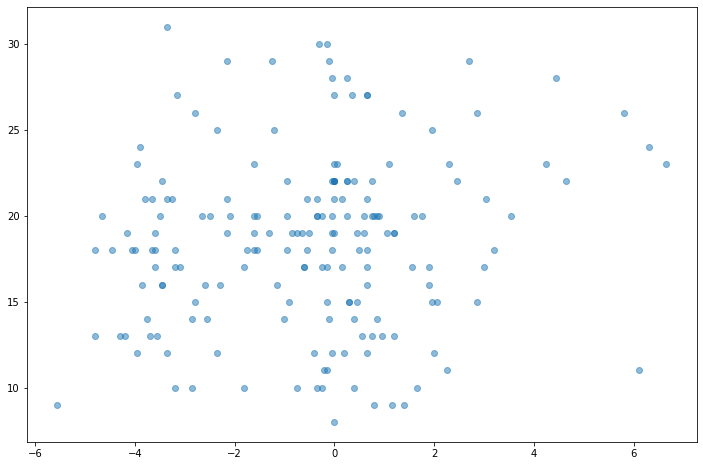

In [96]:
fig = plt.figure()
fig.set_size_inches(12,8)
plt.scatter(df[['3_P4_Alpha Peak_w (716)']],df[["PSS(지각된 스트레스 척도)"]],alpha=0.5)
plt.show()

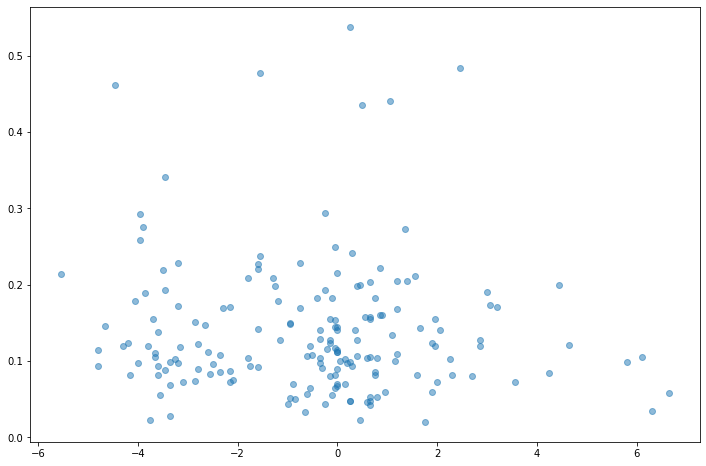

In [97]:
fig = plt.figure()
fig.set_size_inches(12, 8)
plt.scatter(df[['3_P4_Alpha Peak_w (716)']],df[["코르티솔"]],alpha=0.5)
plt.show()

In [98]:
svm_regression_y.score(x_train, y)

0.8227199031127195

In [99]:
svm_regression_z.score(x_train, z)

-3.1133464627473755

In [100]:
gbrt_y.score(x_train,y)

0.01980230695677976

In [101]:
gbrt_z.score(x_train,z)

0.019802306956779092